**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Предобработка данных.
Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#смотрим где пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# удаляем строки, где 'name' и 'genre' не заполнено(они совпадают), так как по ним не заполнено половина колонок и в дальнейшем мы их не сможем все равно использовать
data = data.dropna(subset=['name']).reset_index(drop=True)

In [9]:
#меняем названия столбцов
data.rename(columns={'year_of_release':'year', 'na_sales':'na', 'jp_sales':'jp', 'eu_sales':'eu', 'other_sales':'other'}, inplace=True)

In [10]:
#меняем тип данных
data[['year', 'critic_score']] = data[['year', 'critic_score']].astype('Int64')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
#обнаружили аббревиатуру 'tbd', меняем на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'].unique()
data['user_score'] = data['user_score'].astype('float')

In [12]:
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
data['total_sales'] = data['na'] + data['eu'] + data['jp'] + data['other']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
Name: total_sales, Length: 16713, dtype: float64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16444 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na            16713 non-null  float64
 5   eu            16713 non-null  float64
 6   jp            16713 non-null  float64
 7   other         16713 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
 11  total_sales   16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


In [16]:
data.head(10)

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


In [17]:
data['year'] = data['year'].fillna(0)
# заполняем пропущенные значения , также можно значения удалить, но строк достаточно много

In [18]:
# считаем суммы всех продаж
#data['total_sales'] = data['na'] + data['eu'] + data['jp'] + data['other']
#data['total_sales']
# я не учел если все заменить на 0, то ничего не поменяется)) 

**Видим много пропусков в столбцах rating, critic_score, user_score. Удалять их не будем, отработаем с ними позже.**

In [19]:
# 
data.duplicated().sum()

0

In [20]:
# проверяем 3 ключевые столбца на неявные дубликаты
data.duplicated(subset = ['name', 'platform', 'year']).sum()

1

In [21]:
# находим тот самый 1 дубликат , в приницпе он ни на что не влияет, его можно удалить
duplicated_df = data[data.duplicated(subset = ['name', 'platform', 'year'])].head()
print(duplicated_df) 

                name platform  year   genre   na    eu   jp  other  \
16228  Madden NFL 13      PS3  2012  Sports  0.0  0.01  0.0    0.0   

       critic_score  user_score rating  total_sales  
16228            83         5.5      E         0.01  


In [22]:
data = data.drop_duplicates(subset = ['name', 'platform', 'year']).reset_index(drop=True)
duplicated_df = data[data.duplicated(subset = ['name', 'platform', 'year'])].head()
print(duplicated_df) 

Empty DataFrame
Columns: [name, platform, year, genre, na, eu, jp, other, critic_score, user_score, rating, total_sales]
Index: []


Пропуски могли возникнуть по многим причинам, например: невелся опрос с оценкой игры, игра не популярна и ее никто не оценивал, техническая ошибка и прочее. Мы видим что пропуски в столбцах : оценка от пользователей, от критиков и общий рейтинг. У них примерная корелляция по пропущенным значениям, примерно поровну. Насколько я вижу из таблицы пропуски от 80 до 97 года, скорей всего в эти годы такой графы(пункта) не было.

**Проведем исследовательский анализ данных**

In [23]:
data['year'].max()

2016

In [24]:
data[data['year'] > 1970]['year'].min()

1980

Text(0, 0.5, 'Кол-во игр')

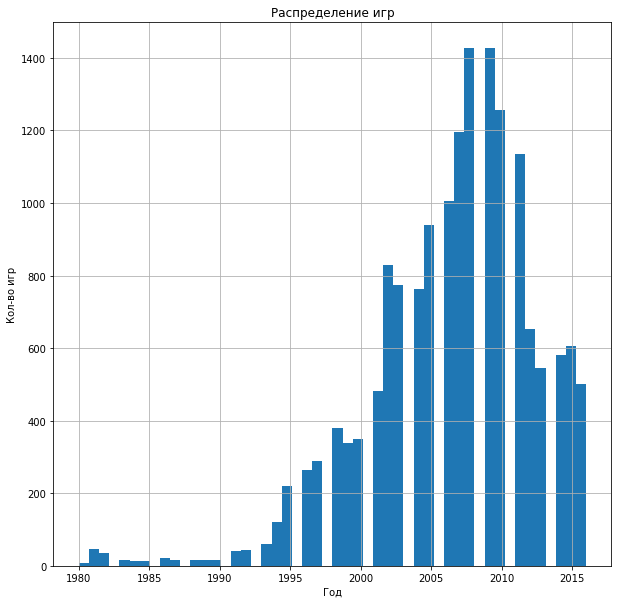

In [25]:
data['year'].hist(bins = 50, range=(1980, 2016),figsize=(10,10))
plt.title('Распределение игр')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')

Text(0, 0.5, 'Кол-во игр')

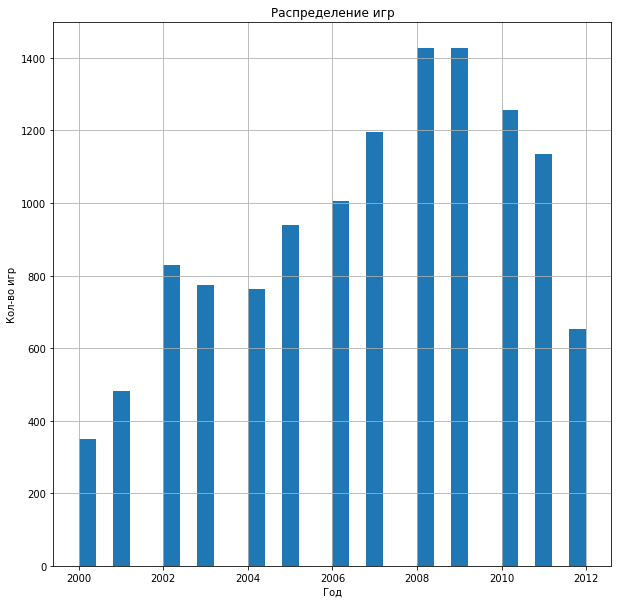

In [26]:
data['year'].hist(bins = 30, range=(2000, 2012),figsize=(10,10))
plt.title('Распределение игр')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')

На мой взгляд есть рост начиная 2005 годом и заканчивая 2012

In [27]:
platform_best= data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top_platform = platform_best.reset_index()
top_platforms_10 = top_platform.head(10)
top_platform = top_platforms_10['platform'].unique()
platform_best


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Text(0, 0.5, 'Общие продажи')

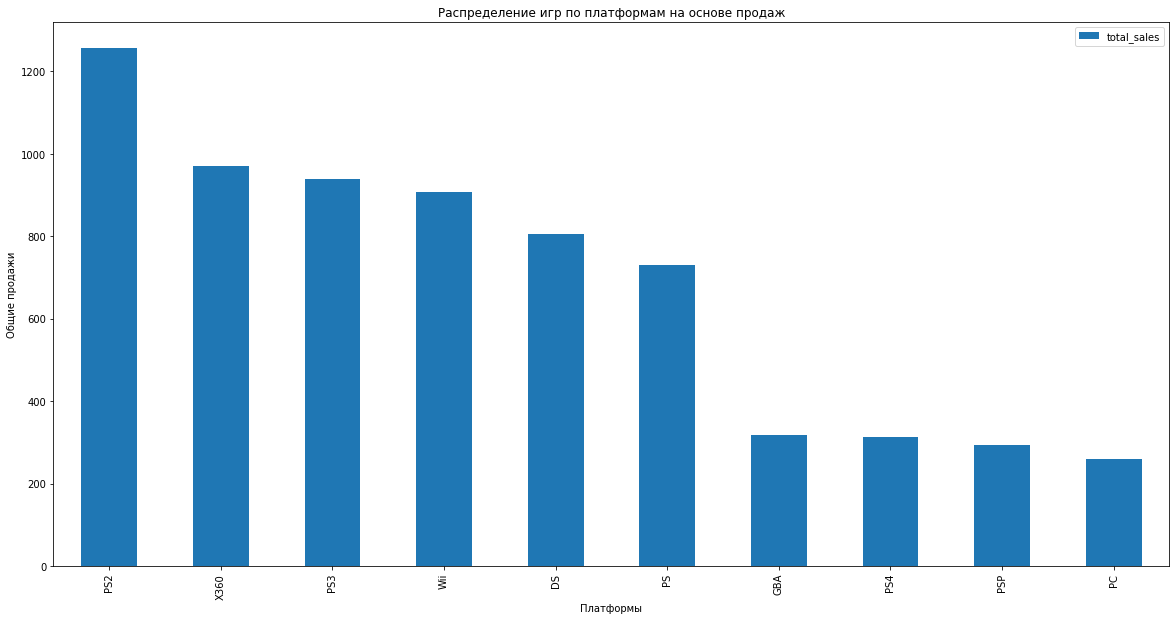

In [28]:
top_platforms_10.plot(x="platform", y="total_sales", kind='bar', figsize=(20,10))
plt.title('Распределение игр по платформам на основе продаж')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

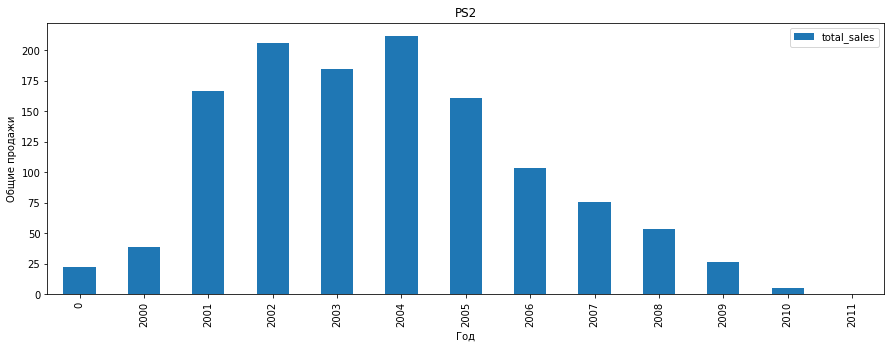

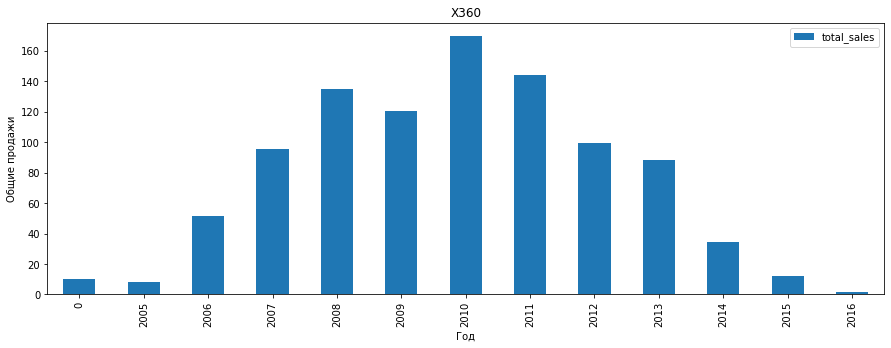

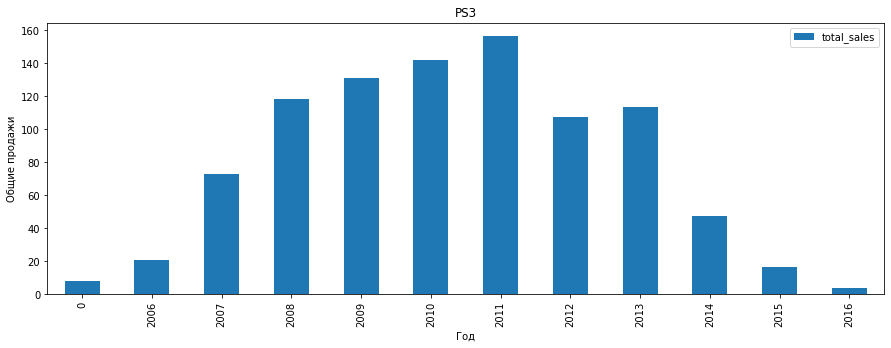

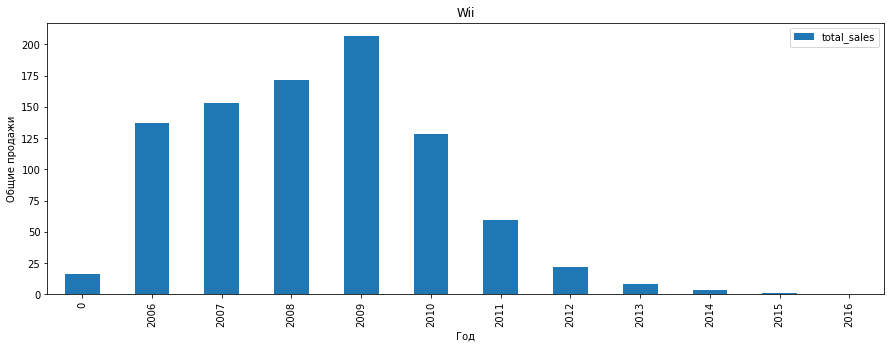

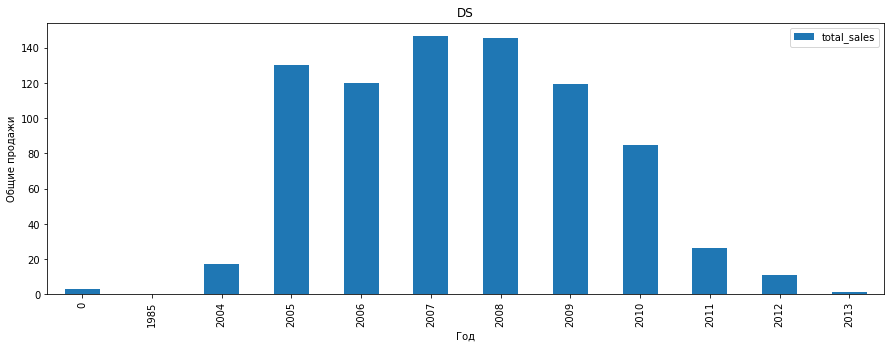

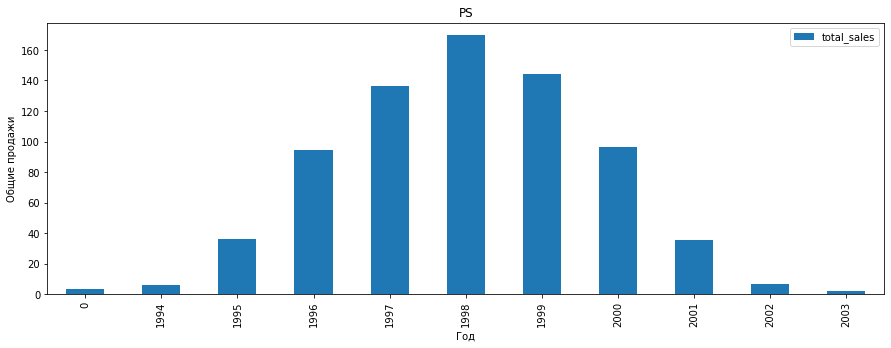

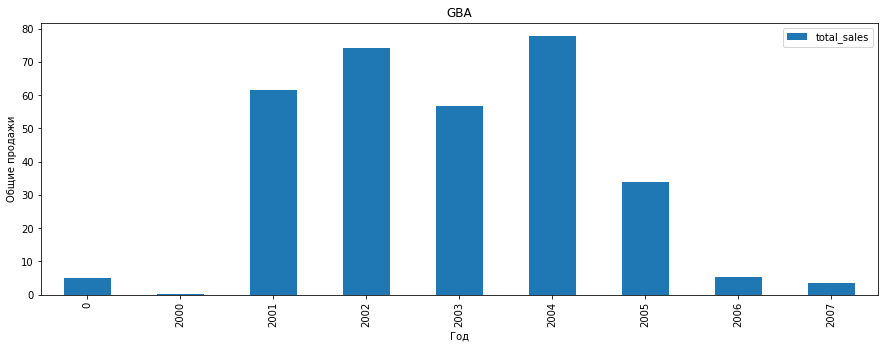

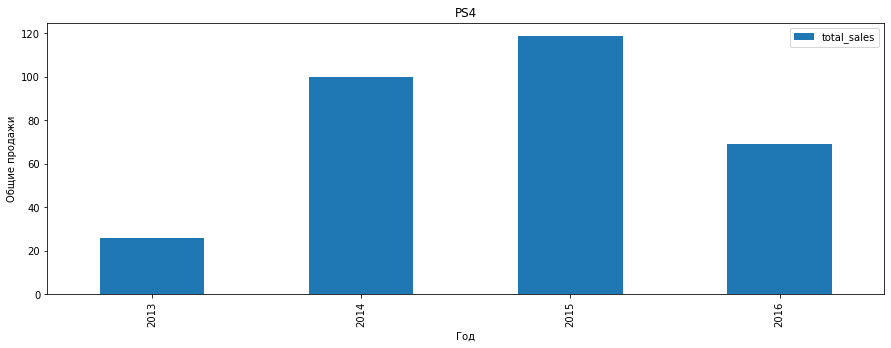

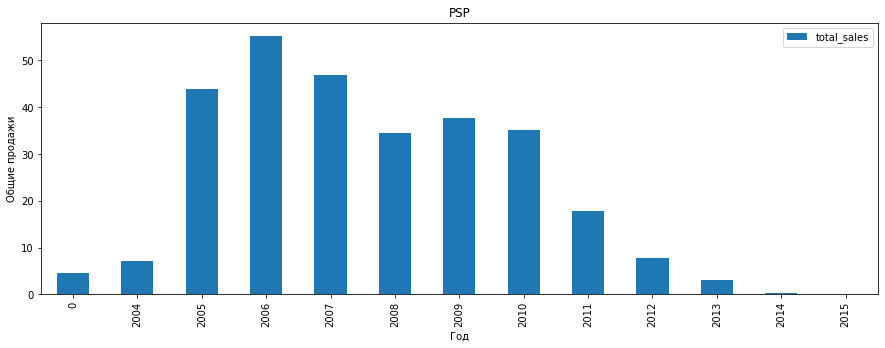

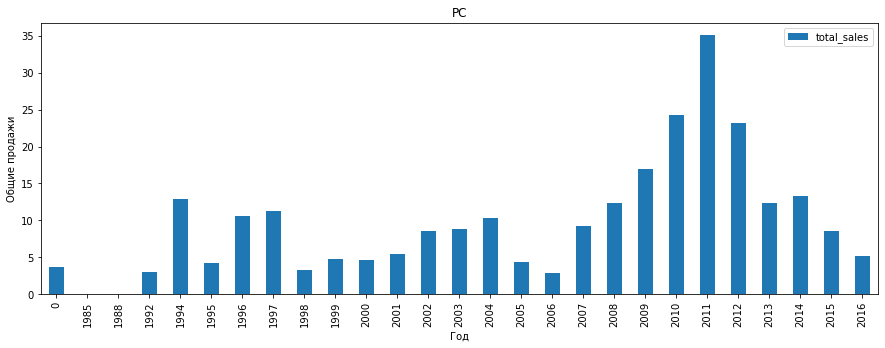

In [29]:
for platform in top_platform:
    data[data['platform'] == platform].pivot_table(index = 'year', values = 'total_sales', aggfunc = 'sum', dropna=True).plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Общие продажи')
 

В целом на каждой платформе мы наблюдаем пики активности несколько лет ( от 4 до 8), а потом снижение интереса.
Как мы уже заметили есть рост на многих платфвормах начиная с 2005 года.

In [30]:
moment = data[data['year'] >= 2012]

Text(0, 0.5, 'Общие продажи')

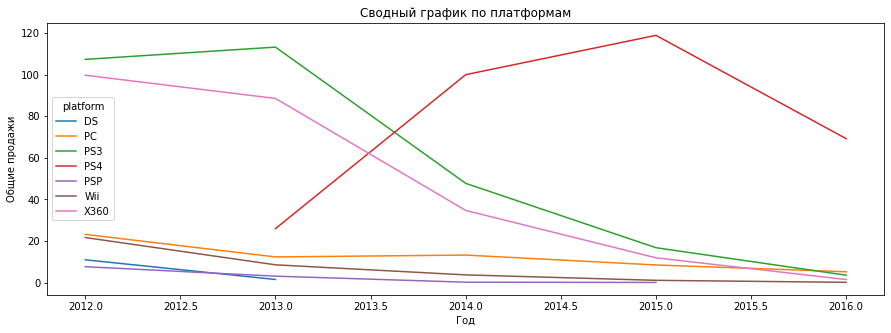

In [32]:
moment[moment['platform'].isin(top_platform)].pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum', dropna=True).plot(figsize=(15,5))
plt.title('Сводный график по платформам')
plt.xlabel('Год')
plt.ylabel('Общие продажи')

Продажи игр на платформах все еще падают, но игры на PS4 находятся в лучшем положении благодаря новизне консоли. Также выгодным вариантом является продажа игр для ПК, которые имеют стабильный спрос. Наибольший спад спроса наблюдается у консолей X360 и PS3, в то время как на остальных консолях отсутствует или очень низок уровень продаж.
С потенциалом сделать прибыль: PC, PS4, XOne

**Дополнение**
Перспективной платформой можно выделить: PS4
Несмотря на то, что у ПК не особо большие продажи она демонстрирует стабильность
Судя по графику можно видеть отрицательный тренд почти на всем рынке видеоигр.
К 2016 году упал продажи у некогда очень продаваемых платформ: PS3,X360, Wii
PC изначально не демонстрировал больших продаж, но все равно заметно снижение

<AxesSubplot:>

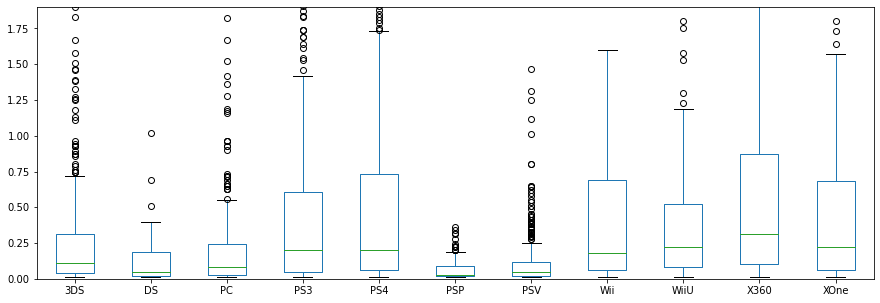

In [33]:
moment.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', figsize=(15,5), ylim=(0,1.9))

На диаграмме не учитывалась популярность консоли XOne, которая только начала набирать популярность. Мы не включили ее в предыдущую диаграмму из-за недостатка игр, но продажи игр на эту консоль очень высоки, так как медианные значения PS4 и XOne почти идентичны. Поэтому мы добавляем XOne в список потенциально прибыльных консолей.
У нас есть много пропусков в данных, которые мы хотим коллерировать, поэтому возьмем одну из популярных консолей, у которой нет данных в 2016. Это PSP

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

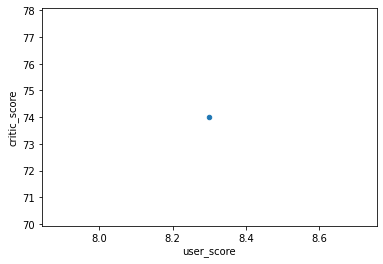

In [34]:
PSP = moment.query('platform == "PSP"')
PSP.plot(x='user_score', y='critic_score', kind='scatter')

In [35]:
XOne = moment.query('platform == "XOne"')
PS4 = moment.query('platform == "PS4"')
PC = moment.query('platform == "PC"')

In [36]:
PSP_cor = PSP[['critic_score','user_score', 'total_sales']]
PSP_cor.corr()

,critic_score,user_score,total_sales
critic_score,NaN,NaN,NaN
user_score,NaN,1.000000,-0.802302
total_sales,NaN,-0.802302,1.000000


In [37]:
PC_cor = PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
total_sales,0.237243,-0.121867,1.000000


In [38]:
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [39]:
XOne_cor = XOne[['critic_score','user_score', 'total_sales']]
XOne_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


PSP - по диаграмме видно, что в целом оценки критиков с оценками пользователей совпадают. По таблице можно сказать, что игровая аудитория прислушивается не только к критикам, но и к игрокам. 
По платформам PC, PS4, XOne однозначно можно сказать, что оценки критиков влияют на количество продаж, а оценки пользователей не принимают во внимание.

In [40]:
#moment.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind='box',figsize=(15,5), ylim=(0,5))

Text(0, 0.5, 'Общие продажи')

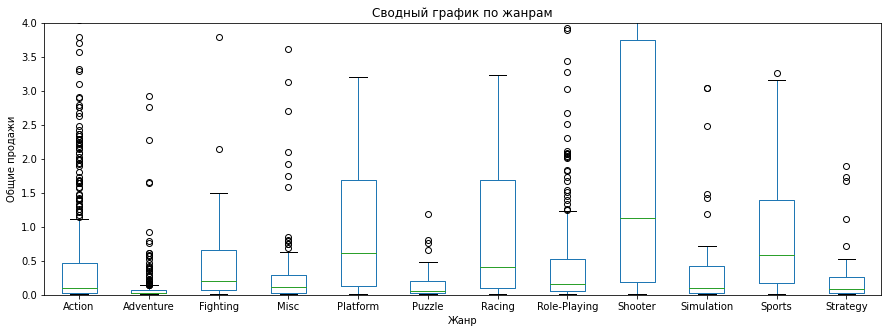

In [41]:
moment.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind='box', figsize=(15,5) ,ylim=(0,4))
plt.title('Сводный график по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')

<AxesSubplot:>

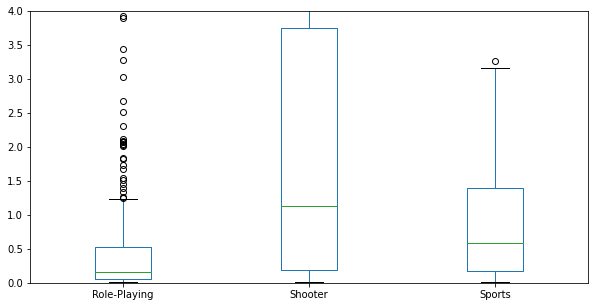

In [42]:
moment.query("genre in ['Shooter', 'Sports', 'Role-Playing']").pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(10,5), ylim=(0,4))

Изучим самые популярные игровые жанры по продажам

array([<AxesSubplot:ylabel='total_sales'>], dtype=object)

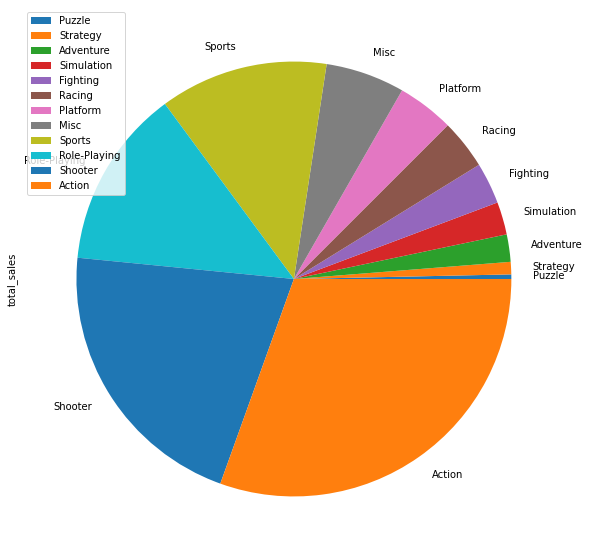

In [44]:
moment.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales').plot.pie(subplots=True,figsize=(10,10))

In [45]:
moment.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Самые прибыльные жанры - Action, Sports, Shooter

Наименее прибыльные жанры - Strategy, Puzzle

In [46]:
moment.groupby('genre')['total_sales'].median().sort_values(ascending=False)
# судя по коэффициенту могу сказать, что предыдущий вывод был рядом

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

Самые прибыльные жанры - Shooter, Sport, Platform  
Наименее прибыльные жанры - Strategy, Adventure 

**Составляем портрет пользователя каждого региона**

Text(0, 0.5, 'Количество')

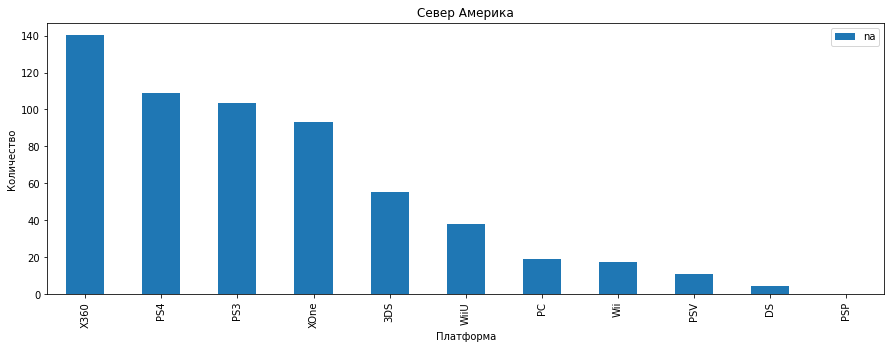

In [47]:
moment.pivot_table(index = 'platform', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(15,5))
plt.title('Север Америка')
plt.xlabel('Платформа')
plt.ylabel('Количество')

Пользователи Северной Америки больше всего предпочитают Xbox360, потому что консоль американская. Платформы Wii, PS3, DS - пользуются также значительной популярностью, но они японские. В сумме продаж преобладают игры на японских консолях.

Text(0, 0.5, 'Количество')

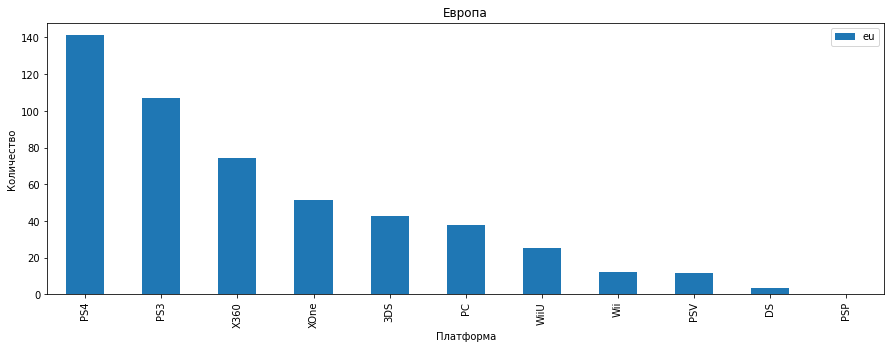

In [48]:
moment.pivot_table(index = 'platform', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(15,5))
plt.title('Европа')
plt.xlabel('Платформа')
plt.ylabel('Количество')

У пользователей Европы популярны и японские платформы, и американская консоль Xbox360. В целом запросы такие же как у пользователей из Северной Америки.

Text(0, 0.5, 'Количество')

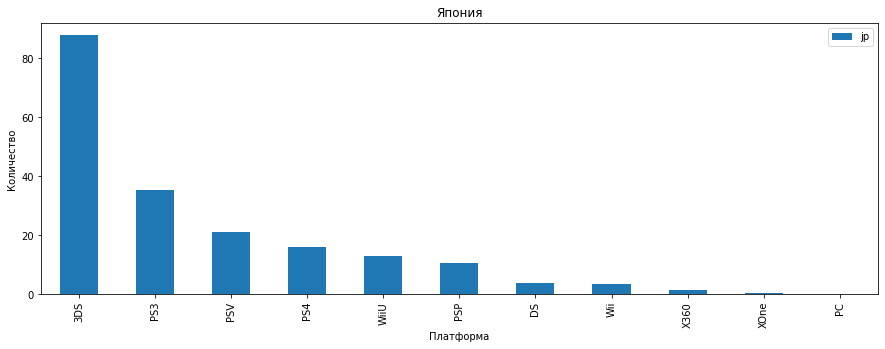

In [49]:
moment.pivot_table(index = 'platform', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(15,5))
plt.title('Япония')
plt.xlabel('Платформа')
plt.ylabel('Количество')

Подавляющее большинство японских пользователей играют в японские платформы, что неудивительно из-за большого разнообразия платформ
Можно сделать общий вывод, что пользователи предпочитают играть на платформах своей же страны

In [50]:
moment.pivot_table(index = 'genre', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na')

,na
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [51]:
moment.pivot_table(index = 'genre', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu')

,eu
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [52]:
moment.pivot_table(index = 'genre', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp')

,jp
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


Консоли, популярные среди пользователей Европы и Северной Америки, также пользуются спросом в Японии, но там более распространены портативные консоли, которые позволяют играть не только дома. В связи с этим, японские игроки предпочитают игры жанра Role-Playing, в то время как игры жанра Shooter у них редко встречаются.

In [53]:
moment.loc[:, 'region'] = moment['eu'] + moment['jp'] + moment['na']
moment['region']

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


16       17.09
23       14.86
31       12.25
33       13.82
34       11.37
         ...  
16700     0.01
16704     0.01
16707     0.01
16709     0.01
16711     0.01
Name: region, Length: 2885, dtype: float64

In [54]:
rate = moment.pivot_table(index = 'rating', values = ['eu','jp','na'], aggfunc = 'sum')
rate

,eu,jp,na
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02


Рейтинг влияет на продажи в отдельных регионах. Так, например, игры с рейтингом EC продавались в основном только в Северной Америке

**Проверяем гипотезы**

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

-Определим пороговое значение alpha = 0.05

1 гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2 гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [56]:
XOne = moment[(moment['platform'] == 'XOne') &  (moment['user_score'] > 0)]['user_score']
PC = moment[(moment['platform'] == 'PC') &  (moment['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.4286407766990274


1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2 : Средние пользовательские рейтинги платформ Xbox One и PC разные    

In [57]:
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


1 гипотеза не подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC разные
H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [58]:
Action = moment[(moment['genre'] == 'Action') &  (moment['user_score'] > 0)]['user_score']
Sports = moment[(moment['genre'] == 'Sports') &  (moment['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports 5.455670103092784


In [59]:
#проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


2 гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные

**Общий вывод**

Шаг 1. Изучение и подготовка данных

Ознакомились с данными, посмотрели на общую информацию о датасете, выявили пропуски и не соответствие типов данных.
На данном шаге мы заполнили некоторые пропуски
Многие пропуски, например в столбцах оценок мы оставили незаполненными, чтобы не исказить статистику.
Также на данном этапе мы посчитали общее количество продаж по всем регионам и записали результат

Шаг 2. Исследовательский анализ данных
Было обнаружено, что рост выпуска игр приходится на 1994 год, а пик на 2008-2009 гг.
Характерный срок жизни платформы - 10 лет, поэтому оставим данные с 2013 по 2016 гг.
3 потенциально прибыльных платформ - PS4, XOne, 3DS.
Наибольшие медианные продажи у платформ X360 и PS3.
Почти у всех платформ есть определенные игры, которые "выстрелили".
Компьютерные игры PC стоят дешевле консольных.
Больше всего игр жанра Action, затем идут Sports, misc и adventure.
Лучше всего покупают игры жанра Action, Sports идёт на втором месте, Shooter неожиданно стоит на третьем месте по продажам, но при этом самый выгодный.
Adventure сильно отстаёт по продажам, хотя игр выпускается много.

Шаг 3. Портрет пользователя региона
В NA самая популярная платформа X360. Европейцы предпочитают PS3. В Японии популярны DS.
В NA и EU самые популярные жанры практически совпадают. В JP вкусы отличаются.
Во всех регионах лидируют игры с рейтингом E - "Для всех". В Европе и Северной Амереке дальше идут по "старшенству". В Японии опять не так. Первое место такое же - "Для всех", а вот на втором - игры для лиц от 13 лет, далее 17+.

Шаг 4. Проверка гипотез
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась